# Checkpoint 3

**Due: Friday, 1 December, 2023 at 4:00pm GMT**

Total points: 100

### Read This First
1. Enter your UID in the cell below according to the instructions there.

1. Use the constants provided in the cells. Do not use your own constants.

1. Wherever you see `raise NotImplementedError()`, remove that line and put your code there.

1. Put the code that produces the output for a given task in the cell indicated. You are welcome to add as many cells as you like for imports, function definitions, variables, etc. Do not alter the argument list of functions that are given to you.

1. Your notebook must run correctly when executed once from start to finish. Your notebook will be graded based on how it runs, not how it looks when you submit it. To test this, go to the *Kernel* menu and select *Restart & Run All*.

1. Once you are happy with it, clear the output by selecting *Restart & Clear Output* from the *Kernel* menu.

1. Submit through Noteable.

1. Unless otherwise stated, all code cells should run within 60 seconds.

# IMPORTANT 

In the following cell you must set the UID variable to be your student matriculation number (UUN), i.e.

`
UID=1769766
`

It must be an integer.

# Do not change it later

It will be used to generate the data that is different from other students. If you do not set it to the correct value, the marker will do so before grading.

In [245]:
UID = 1838711 # set it to your UUN number

# Checking it is integer
assert (type(UID) is int)

In [246]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import time
import scipy

In [247]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

## Problem 1: harmonics of the square wave (25 pts)

A square wave is composed of a fundamental frequency ($f_{0}$) and a series of harmonics at higher frequencies. The harmonics have frequencies that are odd integer multiples of the fundamental frequency (i.e., $f = nf_{0}$ for n = 3, 5, 7,...). The amplitudes of the harmonics obey the following relation:

$
\begin{align}
\large
\frac{|c_k(f)|}{|c_k(f_{0})|} \propto \left( \frac{f}{f_{0}} \right)^{\alpha},
\end{align}
$

where $c_k(f)$ are the Fourier coefficients of the harmonics of the square wave and $\alpha$ is a constant. $c_k(f_{0})$ is the Fourier coefficient of the fundamental frequency.

In the cell below, you are given a square wave signal with time data `t` and signal `y`. You may assume the units of the time data are seconds.

In the cell after, you must do the following:
1. Use the square wave signal to calculate and print the values of $f_{0}$ and $\alpha$. The two printed values must be within 1% of the correct answers (not given to you).
2. Plot the amplitude spectrum of the square wave signal vs. ($f/f_{0}$). Include on the plot the locations of the harmonics, denoted by circles. Plot a curve that fits ($f/f_{0}$) and amplitude of the harmonics. Plot this in log-log to better illustrate the relation between frequency and amplitude. Include all appropriate labels, legends, etc.

You may find the `scipy.signal.find_peaks` function useful.

Assessment: part 1 (calculating $f_{0}$ and $\alpha$) is worth 15 points and part 2 (the plot) is worth 10 points.

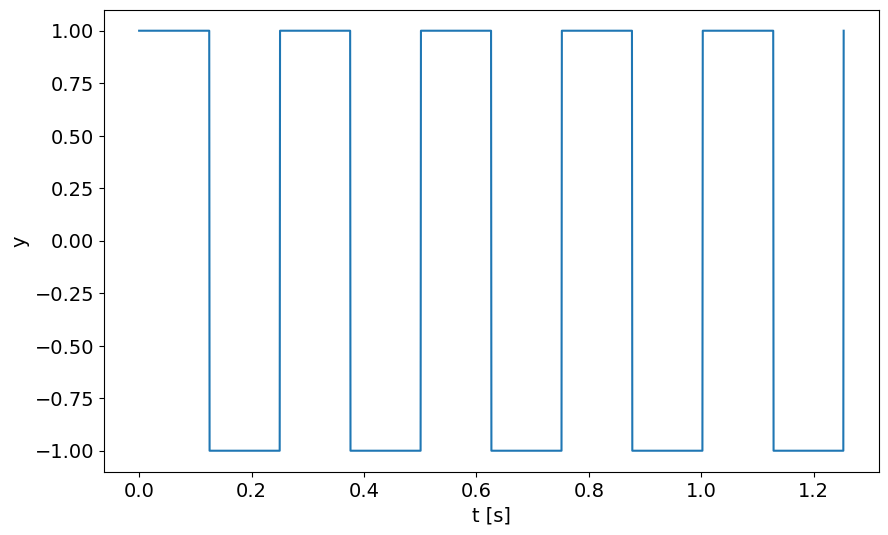

In [248]:
def load_square_wave():
    data = np.loadtxt("squarewaves.txt")
    n, d = 2001, (np.random.default_rng(UID).integers(0, 14, 79)[5] % 7)
    return data[n*d:n*(d+1)].T
t, y = load_square_wave()
plt.plot(t, y)
plt.xlabel("t [s]")
plt.ylabel("y")
plt.show()

In [249]:
ck = np.fft.rfft(y)

tres = np.size(y)/t[-1] # samples/second
freq = np.fft.rfftfreq(y.size,1/tres)
cknorm = abs(ck)

f0_index = np.argmax(cknorm)
f0 = freq[f0_index]

print(f"fundamental frequency: {f0}Hz")
n = np.arange(3,200,2)

harmonic_frequencies = freq[f0_index*n]

fratio = harmonic_frequencies/f0
harmonic_amplitudes = cknorm[f0_index*n]
ampratio = harmonic_amplitudes/cknorm[f0_index]

def harmonic_relation(harmonic_frequencies, alpha):
    return (harmonic_frequencies/f0)**alpha

popt,pcov = scipy.optimize.curve_fit(harmonic_relation,harmonic_frequencies, ampratio,p0=[1])
alpha = popt[0]
print(f"value of alpha: {alpha}")



fundamental frequency: 3.99Hz
value of alpha: -1.0011672109836993


In [250]:
peaks = scipy.signal.find_peaks(abs(ck[:999]),height=0)
peaks = peaks[0]
ckpeak = abs(ck[peaks])
ckpeak = ckpeak[::2]


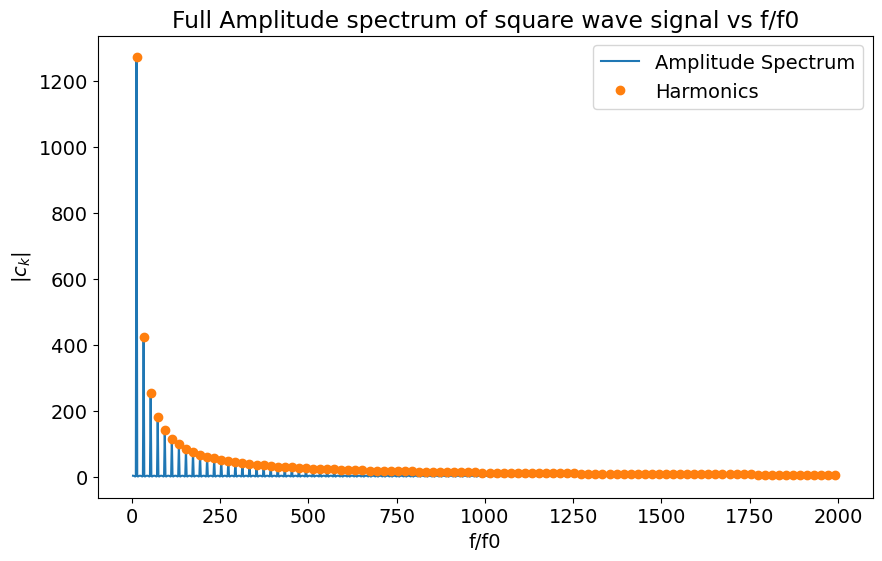

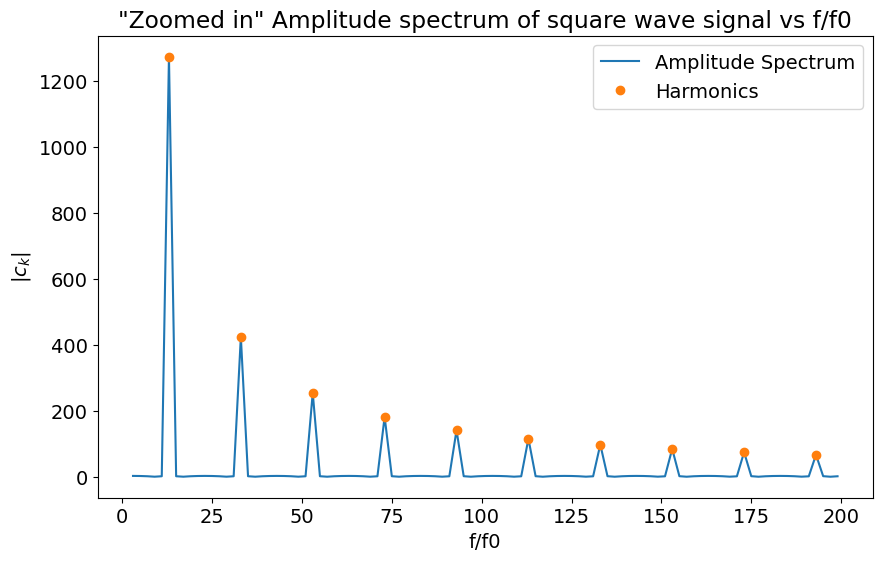

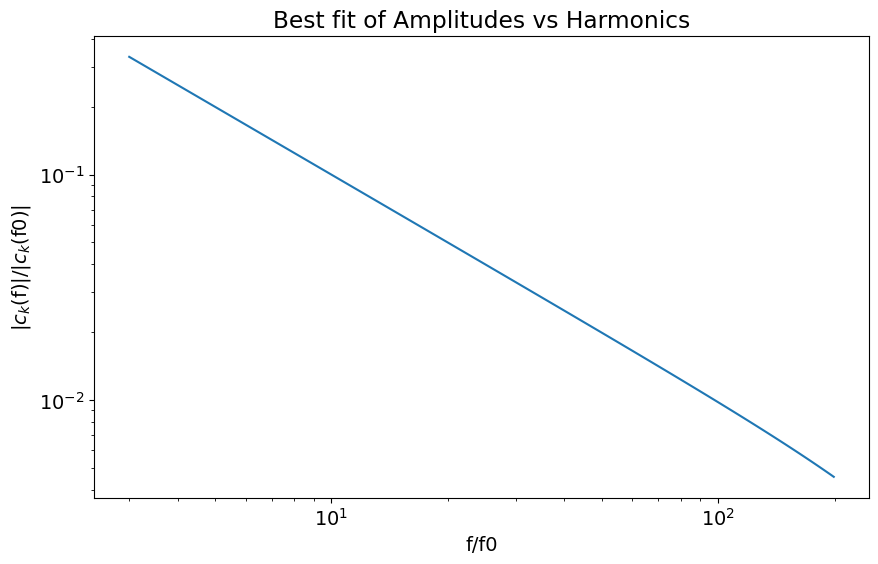

In [251]:
N = np.arange(3,2000,2)
Npeak = N[peaks]
Npeak = Npeak[::2]
plt.plot(N,abs(ck[:999]), label='Amplitude Spectrum')
plt.plot(Npeak, ckpeak,'o', label='Harmonics')
plt.title('Full Amplitude spectrum of square wave signal vs f/f0')
plt.xlabel('f/f0')
plt.ylabel('|$c_{k}$|')
plt.legend()
plt.show()

plt.plot(N[:99],abs(ck[:99]),label='Amplitude Spectrum')
plt.plot(Npeak[:10],ckpeak[:10],'o', label='Harmonics')
plt.title('"Zoomed in" Amplitude spectrum of square wave signal vs f/f0')
plt.xlabel('f/f0')
plt.ylabel('|$c_{k}$|')
plt.legend()
plt.show()

plt.loglog(fratio,ampratio)
plt.title('Best fit of Amplitudes vs Harmonics')
plt.xlabel('f/f0')
plt.ylabel('|$c_{k}$(f)|/|$c_{k}$(f0)|')
plt.show()


## Problem 2: the solar cycle (25 pts)

The number of sunspots visible on the Sun is known to have cyclic behavior. The cell below will load data from a file, "sunspots.txt", consisting of counts of the number of sunspots per month since 1749. The counts are not integers as they have been averaged over multiple observatories. The data is loaded into arrays, `t`, and `y`:

- `t`: the time in years denoting the mid-point of the month
- `y`: the number of sunspots observed in that month

Note, the time resolution is not perfectly constant as the length of a month varies. It is sufficient to consider the time resolution as the mean time spacing of the data.

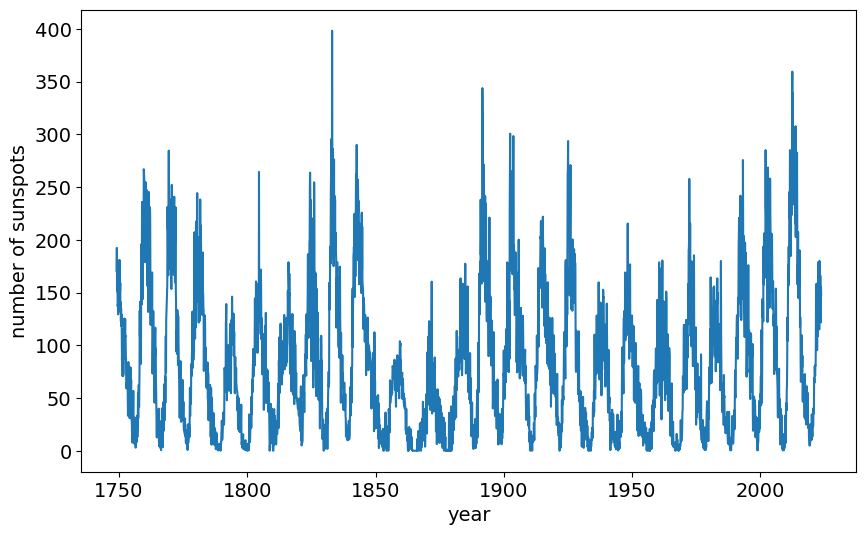

In [252]:
def load_sunspots():
    data = np.loadtxt("sunspots.txt")
    n, d = 3297, (np.random.default_rng(UID).integers(6, 16, 84)[78] % 5)
    return data[n*d:n*(d+1)].T
t, y = load_sunspots()
plt.plot(t, y)
plt.xlabel("year")
plt.ylabel("number of sunspots")
plt.show()

## Task 1: 10 pts

Compute and print the period of the primary mode of the solar cycle using Fourier-based methods. Include appropriate units. The value must be within 1% of the correct answer (as computed in this way). 

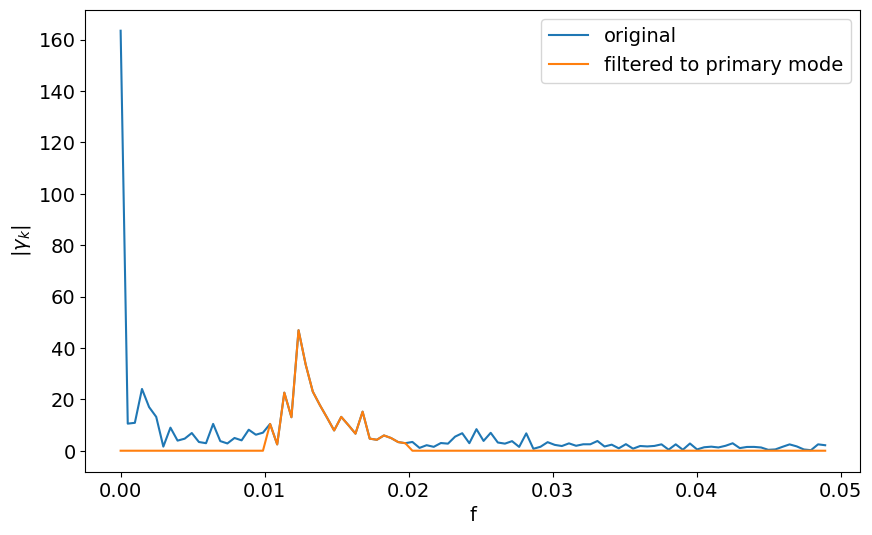

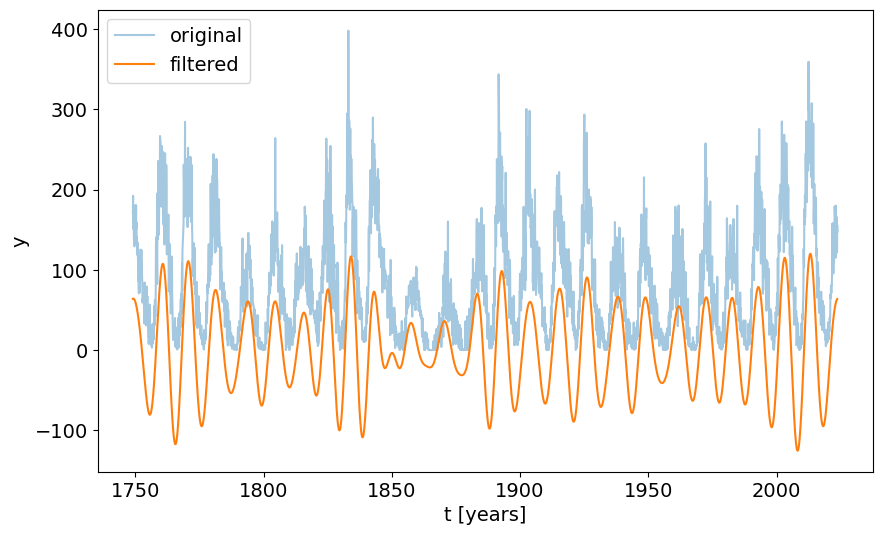

 The period of the solar cycle is on average 10.556760000000004 years


In [253]:
ck = np.fft.rfft(y)
f = np.arange(ck.size)/t[-1]

centre = np.abs(ck).argmax()
region1 = np.abs(f[centre] - f) > 0.02 # filter data to include primary mode only
region2 = np.abs(f[centre] - f) <0.01
cknew = ck.copy()
cknew[region1] = 0
cknew[region2] = 0
ynew = np.fft.irfft(cknew)

plt.plot(f[:100], abs(ck)[:100]/ck.size, label="original")
plt.plot(f[:100], abs(cknew)[:100]/ck.size, label="filtered to primary mode")
plt.xlabel('f')
plt.ylabel('|$\gamma_{k}$|')
plt.legend()
plt.show()

plt.plot(t, y, label="original", alpha=0.4)
plt.plot(t[:3296], ynew, label="filtered")
plt.xlabel('t [years]')
plt.ylabel('y')
plt.legend()
plt.show()

peaks = scipy.signal.find_peaks(ynew)
peaks = peaks[0]
maxima = t[peaks]
periods = []

for i in range(len(peaks) - 1):
    period = maxima[i+1] - maxima[i]
    periods.append(period)

period_average = sum(periods)/len(periods)

print(f" The period of the solar cycle is on average {period_average} years")

## Task 2: 15 pts

Locations of minima and maxima in the solar cycle are often found by smoothing the data with a 13-month "tapered-boxcar". The tapered-boxcar window consists of all 1s (like the boxcar) except for the first and last value, which are 0.5. The value at each time is calculated as the 13-month (-6 to +6 months) weighted average using the tapered-boxcar. In the cell below, complete the following tasks:

1. Use this smoothed data to predict the time of the next solar maximum based on the time of the most recent maximum. Print the month and year of the next maximum. Your answer should be accurate to within 2 months of the correct answer (as computed by this method).

1. The start of a solar cycle is considered to be the point of minimum activity. Using the tapered-boxcar smoothed data, calculate which cycle had a length closest to the period calculated in Task 1. Do this in the cell below and print the number of the cycle. Solar cycles are counted starting at 1.

1. Make a plot that includes the following:
   - the original data of the number of sunspots vs. time
   - the smoothed data from the previous task vs. time
   - a shaded, semi-transparent rectangle covering the time period corresponding to the most average cycle (the matplotlib `fill_betweenx` command might be useful for this)
   - a vertical line denoting the predicted time of the next maximum.

   Include all appropriate labels, units, and legends.
   
**Note, the data has been randomly scrambled, so your answers will not resemble published predictions.**

Assessment: each of the three parts is worth 5 points.

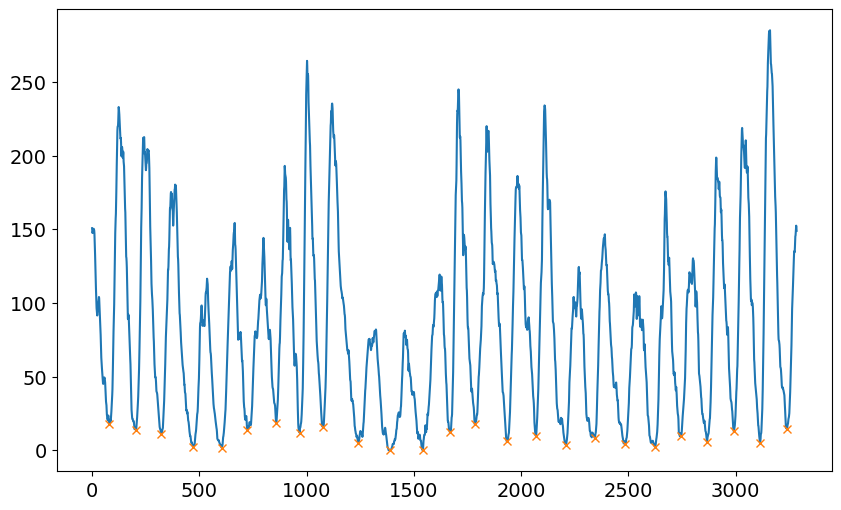

 The next maximum will occur in February 2033 
 The solar cycle with period  closest to the period calculated in Task 1 has cycle number 9 


In [254]:
import math
box = np.ones(13)
box[0] = 0.5
box[-1] = 0.5

# find next maxima
ybox = scipy.signal.fftconvolve(y,box,mode='valid')/box.sum()

shift = box.size//2
peaks = scipy.signal.find_peaks(ybox)
peaks = peaks[0]
maxima = t[peaks]
most_recent_maxima = maxima[-1]
next_maxima = most_recent_maxima + period_average

year = math.floor(next_maxima)
month_decimal = next_maxima - year
months = np.linspace(0,1,12)
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']
month_fit = months - month_decimal
month_loc = np.where(np.abs(month_fit) == np.min(np.abs(month_fit)))[0][0]

# find the minimums
peaks, _ = scipy.signal.find_peaks(-1*ybox, height=-20, distance=50) # take negative of y data and find the peaks with appropriate height and distance to be unique minima
plt.plot(ybox)
plt.plot(peaks, ybox[peaks], "x")
plt.plot(minima_list[loc])
minima_list = ybox[peaks]
minima_t = t[peaks]
plt.show()

# find distances between each minima
minima_period_list = []
for i in range(1, len(minima_list)):
    distance_between = abs(minima_list[i] - minima_list[i-1])
    minima_period_list.append(distance_between)

# find minima with period closest to that found in task 1
loc = np.where(np.abs(minima_period_list- period_average)==np.min(np.abs(minima_period_list - period_average)))[0][0]
start=[minima_t[loc],minima_list[loc]]
end=[ minima_t[loc+1],minima_list[loc+1]]
print(f" The next maximum will occur in {month_names[month_loc]} {year} ")
print(f" The solar cycle with period  closest to the period calculated in Task 1 has cycle number {loc+1} ")





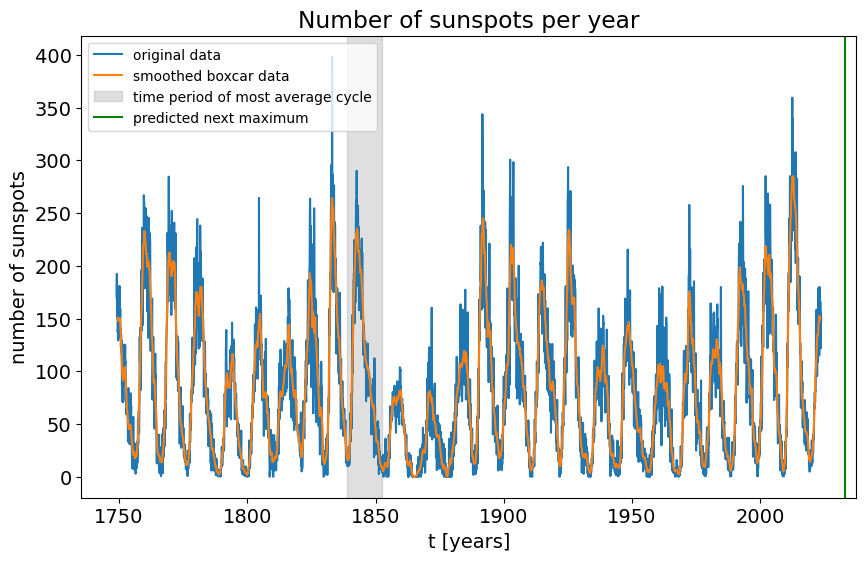

In [255]:
# 3. Plots

plt.plot(t, y, label="original data")
plt.plot(t[shift:-shift], ybox, label="smoothed boxcar data")
plt.axvspan(minima_t[loc], minima_t[loc+1], alpha=0.25, color='grey',label='time period of most average cycle')
plt.axvline(x=next_maxima, label ='predicted next maximum',color='green')
plt.title('Number of sunspots per year')
plt.xlabel("t [years]")
plt.ylabel("number of sunspots")
plt.legend(fontsize=10,loc='upper left')
plt.show()

## Problem 3: baseballs in flight (50 pts)

In this problem, you will simulate the flight of batted baseballs in a 3D Cartesian coordinate system. The coordinate system is shown below on the left:

![](baseball.png)

The initial velocity of the ball is assumed to be entirely in the y-z plane. The y axis points forward along the ground and the z axis points vertically up. The x axis points to the right of a forward trajectory. The launch angle, $\theta$, is the angle of the velocity vector with respect to the horizontal (x-y) plane, such that:

$
\begin{equation}
\large
\vec{v} = v_{x} \hat{x} + v_{y} \hat{y} + v_{z} \hat{z}, \\
\large
v_{x} = 0, \\
\large
v_{y} = v \cos \theta, \\
\large
v_{z} = v \sin \theta,
\end{equation}
$

where $v$ is the magnitude of the velocity vector, $\vec{v}$, and

$
\begin{equation}
\large
\hat{v} = \frac{\vec{v}}{v}.
\end{equation}
$

As illustrated on the above right, the trajectory of batted baseballs is determined by a combination of three forces: gravity ($\vec{F_{G}}$), drag (air resistance, $\vec{F_{D}}$), and the Magnus force (spin, $\vec{F_{M}}$).

### Gravity

The force of gravity acts downward along the z axis:

$
\begin{equation}
\large
F_{G_{z}} = -mg,
\end{equation}
$

where $m$ is the mass of the baseball and $g$ is the acceleration due to gravity.

### Air Resistance

The drag force, $\vec{F_{D}}$, is defined as

$
\begin{align}
\large
\vec{F_{D}} = -\frac{1}{2} C_{D} A \rho v^{2} \hat{v},
\end{align}
$

where $C_{D}$ is the drag coefficient, $A$ is the cross-sectional area of the ball, and $\rho$ is the density of air. The velocity used here should technically be considered with respect to the wind, but for this exercise we will assume no wind. The drag force is oriented opposite to the velocity of the ball. The drag coefficient is given by

$
\begin{equation}
\large
C_{D} = C_{D,0} + C_{D,1} \left( \frac{\omega}{16.67\ \mathrm{rot/s}} \right).
\end{equation}
$

### Magnus Force

Spinning baseballs also experience the Magnus force, often seen as top-spin, back-spin, side-spin, etc. The Magnus force acts perpendicular to both the velocity and the axis of rotation, and is given by

$
\begin{equation}
\large
\vec{F_{M}} = \frac{1}{2} A \rho C_{L} v^{2} (\hat{\omega} \times \hat{v}),
\end{equation}
$

where $C_{L}$ is the lift coefficient and $\omega$ is the rotation vector of the ball with units of rotations per second. Note, the direction of the Magnus force is the vector cross product of $\hat{\omega}$ and $\hat{v}$ (the unit vectors of $\vec{\omega}$ and $\vec{v}$).

For this exercise, $\vec{\omega}$ will be entirely in the x direction (i.e., $\omega = \omega_{x}$), where back-spin corresponds to $\omega_{x} > 0$ and top-spin $\omega_{x} < 0$. The direction and magnitude of the spin is assumed to be constant during the flight of the ball.

The lift coefficient is given by

$
\begin{equation}
\large
C_{L} = \frac{C_{L,2} S}{C_{L,0}\ +\ C_{L,1} S},
\end{equation}
$

where the spin factor, $S$, is

$
\begin{equation}
\large
S = \frac{r \omega}{v},
\end{equation}
$

where $r$ is the radius of the ball. Note, $S$ is a scalar, not a vector.

All relevant constants are given in the cell below. You must use these and not your own values.

In [263]:
# baseball constants
m = 0.145 # mass in kg
c = 23.2  # circumference in cm
r = c / 2 / np.pi / 100 # radius in m
A = np.pi * (r)**2 # cross-sectional area in m^2

# drag coefficients
CD0 = 0.297
CD1 = 0.0292

# lift coefficients
CL0 = 0.583
CL1 = 2.333
CL2 = 1.120

# Earth-related constants
rhoE = 1.18 # air density at sea level kg/m^3
g = 9.80665 # gravitational acceleration m/s^2

## Task 1: 20 pts

Compute the motion of a batted ball in four scenarios:
1. only the force of gravity (no drag or Magnus forces)
1. gravity and drag forces with no spin ($\omega = 0$)
1. gravity and drag forces with $\vec{\omega} = (50\ \mathrm{rot/s}) \hat{x}$, but without Magnus force
1. gravity, drag, and Magnus force with $\vec{\omega} = (50\ \mathrm{rot/s}) \hat{x}$.

The conditions of flight are as follow:
1. The initial position of the ball is 1 m off the ground (the height of a hittable pitch) at the origin of the x-y plane, i.e. (0, 0, 1) m.
1. The ball lands when its height reaches 0.

You must write a function (`p3_task1`) that takes two arguments: the initial speed of the ball in m/s and the launch angle in degrees. Your function should return four numbers: the dispacement along the ground of the ball for each scenario in meters. It should also produce a plot of ground displacement vs. height for all four scenarios.

The relevant constants are provided in the cell above. Use these in your calculation.

Your answers must be within 0.1 m of the correct displacement values. You will be given values to test against and we will mark against other values.

Assessment: computing the distances correctly will be worth 4 points for each scenario. A correct plot will be worth another 4 points.

In [264]:
from scipy.integrate import solve_ivp

In [265]:
def gravity(t,f):
    """
    f0 = x => dx/dt = vx
    f1 = y => dy/dt = vy
    f2 = z => dz/dt = vz
    f3 = vx => dvx/dt = 0
    f4 = vy => dvy/dt = 0
    f5 = vz => dvz/dt = - g
    """
    vals = np.zeros_like(f)
    vals[0] = f[3]
    vals[1] = f[4]
    vals[2] = f[5]
    vals[3] = 0
    vals[4] = 0
    vals[5] = -g
    
    return vals

def drag(t,f):
    """
    f0 = x => dx/dt = vx
    f1 = y => dy/dt = vy
    f2 = z => dz/dt = vz
    f3 = vx => dvx/dt = 0
    f4 = vy => dvy/dt = -F_d cos(theta)
    f5 = vz => dvz/dt = - g - F_d sin(theta)
    """
    vals = np.zeros_like(f)
    vals[0] = f[3] #vx
    vals[1] = f[4] #vy
    vals[2] = f[5] #vz
    vmag = np.sqrt((vals[0])**2 + (vals[1])**2 + (vals[2])**2) 
    drag = 0.5*CD0*A*rhoE*vmag**2
    vals[3] = 0
    vals[4] =  -drag*vals[1]/(vmag*m) #Fy
    vals[5] = -g -drag*vals[2]/(vmag*m) #Fz
    
    return vals

def omega(t,f):
    """
    f0 = x => dx/dt = vx
    f1 = y => dy/dt = vy
    f2 = z => dz/dt = vz
    f3 = vx => dvx/dt = -dragX
    f4 = vy => dvy/dt = -F_d cos(theta) -dragX
    f5 = vz => dvz/dt = - g - F_d sin(theta) -dragX
    """
    vals = np.zeros_like(f)
    vals[0] = f[3] #vx
    vals[1] = f[4] #vy
    vals[2] = f[5] #vz
    vmag = np.sqrt((vals[0])**2 + (vals[1])**2 + (vals[2])**2) 
    drag = 0.5*CD0*A*rhoE*vmag**2
    dragX = 0.5*CD1*(50/16.67)*A*rhoE*vmag**2
    vals[3] = -dragX
    vals[4] =  -drag*vals[1]/(vmag*m) -dragX*vals[1]/(vmag*m)#Fy
    vals[5] = -g -drag*vals[2]/(vmag*m) -dragX*vals[2]/(vmag*m) #Fz
    
    return vals

def magnus(t,f):
    """
    f0 = x => dx/dt = vx
    f1 = y => dy/dt = vy
    f2 = z => dz/dt = vz
    f3 = vx => dvx/dt = 0
    f4 = vy => dvy/dt = -F_d cos(theta)
    f5 = vz => dvz/dt = - g - F_d sin(theta)
    """
    vals = np.zeros_like(f)
    vals[0] = f[3] #vx
    vals[1] = f[4] #vy
    vals[2] = f[5] #vz
    
    vmag = np.sqrt((vals[0])**2 + (vals[1])**2 + (vals[2])**2) 
    drag = 0.5*CD0*A*rhoE*vmag**2
    dragX = 0.5*CD1*(50/16.67)*A*rhoE*vmag**2
    
    S = r*50/vmag
    CL = CL2*S/(CL0+CL1*S)
    magnus = 0.5*CL*A*rhoE*vmag**2
    vals[3] = -dragX
    vals[4] =  -drag*vals[1]/(vmag*m) -dragX*vals[1]/(vmag*m) - magnus*vals[2]/(vmag*m)
    vals[5] = -g -drag*vals[2]/(vmag*m) -dragX*vals[2]/(vmag*m) + magnus*vals[1]/(vmag*m)
    
    return vals 

def lands(t,f):
    return f[2]
lands.terminal = True
lands.direction = -1

def p3_task1(vi, theta):
    
    theta = theta*np.pi/180 # convert to radians
    vx = 0
    vy = vi*np.cos(theta)
    vz = vi*np.sin(theta)
    
    fi = np.array([0,0,1,0,vy,vz])
   
    sol1 = solve_ivp(gravity, (0,25), fi, events=(lands), dense_output = True)
    dist1 = (max((sol1.y)[1]))
    
    sol2 = solve_ivp(drag, (0,25), fi, events=(lands), dense_output = True)
    dist2 = (max(sol2.y[1]))
    
    sol3 = solve_ivp(omega, (0,25), fi, events=(lands), dense_output = True)
    dist3 = (max(sol3.y[1]))
    
    sol4 = solve_ivp(magnus, (0,25), fi, events=(lands), dense_output = True)
    dist4 = (max(sol4.y[1]))
    
    tf1 = sol1.t_events[0][0]
    tf2 = sol2.t_events[0][0]
    tf3 = sol3.t_events[0][0]
    tf4 = sol4.t_events[0][0]
    
    t1 = np.linspace(0, tf1, 100)
    t2 = np.linspace(0, tf2, 100)
    t3 = np.linspace(0, tf3, 100)
    t4 = np.linspace(0, tf4, 100)
    
    y1 = sol1.sol(t1)
    y2 = sol2.sol(t2)
    y3 = sol3.sol(t3)
    y4 = sol4.sol(t4)
    
    
    plt.plot(y1[1], y1[2], label='Gravity only')
    plt.plot(y2[1], y2[2],label='Gravity+Drag')
    plt.plot(y3[1], y3[2],label='Gravity+Drag+Spin')
    plt.plot(y4[1], y4[2],label='Gravity+Drag+Spin+Magnus')
    plt.title('Trajectory of baseball under different combinations of forces')
    plt.xlabel("Ground Displacement [m]")
    plt.ylabel("Height [m]")
    plt.legend()
    plt.show()
    
    return [dist1,dist2,dist3,dist4]



Below, the code will be tested. We will also test against additional secret inputs.

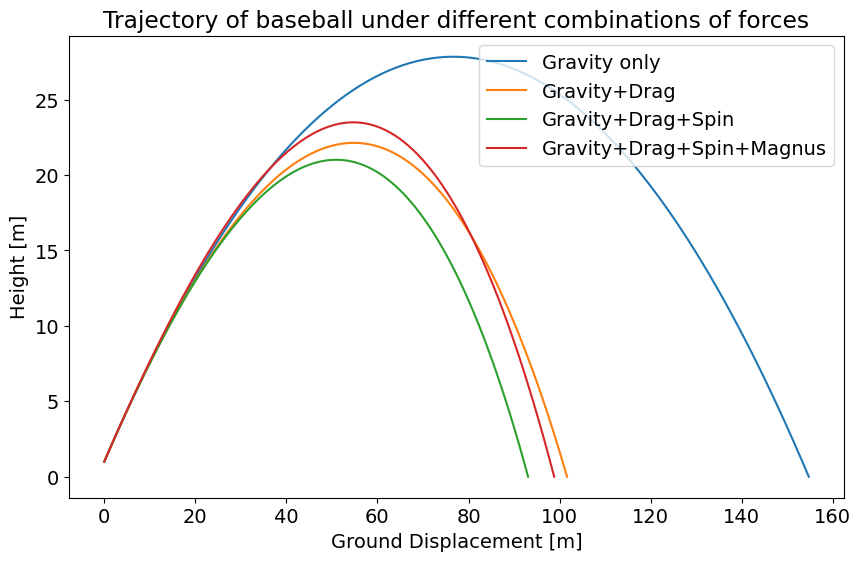

Distances: [154.73025496793932, 101.63461672423742, 93.07916584635112, 98.80817775798286] m.
True distances: [154.73025496793943, 101.63461672423742, 93.08091816428875, 98.8237443311187] m.
Errors: [1.13686838e-13 0.00000000e+00 1.75231794e-03 1.55665731e-02] m.


In [266]:
vi = 40 # m/s
theta = 35 # degrees
dis_true = [154.73025496793943, 101.63461672423742, 93.08091816428875, 98.8237443311187]
dis = p3_task1(vi, theta)
print (f"Distances: {dis} m.")
print (f"True distances: {dis_true} m.")
err = np.abs(np.array(dis) - np.array(dis_true))
print (f"Errors: {err} m.")
assert (err < 0.1).all()

## Task 2: 20 pts

Given a distribution of initial speeds, launch angles, and spin rates, compute the fraction of batted baseballs that travel at least a certain distance. Write a function below (`p3_task2`) to accept mean and standard deviation values for initial speed in m/s, launch angle in degrees, and spin rate in rot/min, as well as a distance. Your function should compute the fraction of baseballs with final ground displacement greater than that distance. We will call the function below with the following values:
- initial speed: mean, standard deviation - 30, 5 (m/s)
- launch angle: mean, standard deviation - 20, 10 (degrees)
- spin rate: mean, standard deviation - 33.33, 33.33 (rot/s)
- threshold distance: 100 m

Note, a negative launch angle is perfectly acceptable.

Given a number of detections, $N$, the relative uncertainty is given by $N^{-1/2}$. In this case, $N$ is the number of baseballs exceeding the distance threshold for a given sample size. Your function must calculate the fraction of baseballs exceeding the distance threshold to within an uncertainty of 10% (0.1). Answers must be within 10% of the correct answer.

Your code will also be run on a secret set of input values. The code should run in roughly 3 minutes or less.

Assessment: 20 points will be awarded for correct answers computed within the time limit. Incorrect answers will received maximally half credit. Exceeding the time limit by more than 60 seconds will receive maximally half credit. Code taking longer than 5 minutes will be stopped and considered not functional.

In [267]:
def magnus2(t,f):
    """
    added variable w input for use in this task
    
    f0 = x => dx/dt = vx
    f1 = y => dy/dt = vy
    f2 = z => dz/dt = vz
    f3 = vx => dvx/dt = 0
    f4 = vy => dvy/dt = -F_d cos(theta)
    f5 = vz => dvz/dt = - g - F_d sin(theta)
    """
    vals = np.zeros_like(f)
    vals[0] = f[3] #vx
    vals[1] = f[4] #vy
    vals[2] = f[5] #vz
    w = f[6]
    vmag = np.sqrt((vals[0])**2 + (vals[1])**2 + (vals[2])**2) 
    drag = 0.5*CD0*A*rhoE*vmag**2
    dragX = 0.5*CD1*(w/16.67)*A*rhoE*vmag**2
    
    S = r*w/vmag
    CL = CL2*S/(CL0+CL1*S)
    magnus = 0.5*CL*A*rhoE*vmag**2
    vals[3] = -dragX
    vals[4] =  -drag*vals[1]/(vmag*m) -dragX*vals[1]/(vmag*m) - magnus*vals[2]/(vmag*m)
    vals[5] = -g -drag*vals[2]/(vmag*m) -dragX*vals[2]/(vmag*m) + magnus*vals[1]/(vmag*m)
    return vals

In [268]:
def p3_task2(vi_mean, vi_std, theta_mean, theta_std, spin_mean, spin_std, distance):
    
    num_samples = 100000
    vi_samples = np.random.normal(vi_mean, vi_std,num_samples)
    theta_samples = np.random.normal(theta_mean, theta_std,num_samples)
    spin_samples = np.random.normal(spin_mean, spin_std,num_samples)
    counts = 0
    
    
    for i in range(num_samples):
        theta = theta_samples[i]*np.pi/180 # convert to radians
        vx = 0
        vy = vi_samples[i]*np.cos(theta)
        w = spin_samples[i]
        vz = vi_samples[i]*np.sin(theta_samples[i])
        fi = np.array([0,0,1,0,vy,vz,w])
        
        sol = solve_ivp(magnus2, (0,25), fi, events=(lands), dense_output = True)
        dist = (max((sol.y)[1]))
        
        if dist>distance:
            counts += 1
    
    fraction = counts/num_samples
    
    return fraction
    

Below, the code will be tested. We will test against additional secret inputs.

In [269]:
t1 = time.time()
val = p3_task2(30, 5, 20, 10, 33.33, 33.33, 100)
t2 = time.time()
print (f"Fraction is {val}.")
print (f"Computed in {t2-t1} seconds.")

Fraction is 0.1049.
Computed in 145.06536388397217 seconds.


## Task 3: 10 pts

Consider the following initial conditions for the flight of a baseball.
- initial speed: 50 m/s
- launch angle: 30 degrees
- spin rate: 50 rot/s

This "control run" will result in a certain flight time and landing spot. Keeping the spin rate constant, compute the minimum initial speed such that the ball lands in the same spot as the control run, but does a loop while in flight. A minimal loop is defined such that the ball's forward velocity briefly reverses (i.e., becomes negative) before continuing forward.

The function (`p3_task3`) should return the minimum initial speed required to make the ball travel in a loop and produce a plot of displacement vs. height. The answer should be within 10% of the correct value (not given).

Assessment: 10 points awarded for correct answer and plot with maximally half credit for incorrect answers.

In [312]:
def p3_task3():
    
    vi = 50
    theta = 30*np.pi/180
    
    vx = 0
    vy = vi*np.cos(theta)
    vz = vi*np.sin(theta)
    
    fi = np.array([0,0,1,0,vy,vz])
   
    sol = solve_ivp(magnus, (0,25), fi, events=(lands), dense_output = True)
    dist = (max((sol.y)[1]))
    tf = sol.t_events[0][0]
    print(f'control run distance: {dist} m')
    
    control_run = dist
    
    vvals =np.linspace(1,200,1000)
    loop_distances = []
   
    N = len(vvals)
    vlist = []
    
    for i in range(N):
        vi = vvals[i]
        vx = 0
        vy = vi*np.cos(theta)
        vz = vi*np.sin(theta)
        floop = np.array([0,0,1,0,vy,vz])
        sol_dist = solve_ivp(magnus, (0,25), floop, events=(lands), dense_output = True)
        sol_loop = solve_ivp(magnus, (0,25), floop, events=(loops), dense_output = True)
        loop_dist = ((max((sol_loop.y)[1])))
        print((sol_loop.y))
        ind = np.where((sol_loop.y)[1] > 0)
        loopdistance = max(((sol_loop.y)[1])[ind])
        distance = (max((sol_dist.y)[1]))
        if loopdistance < distance: # true for ball to do a loop
            loop_distances.append(loopdistance)
            vlist.append(vi)
        
    print(loop_distances)
    
def loops(t,f):
    return f[4]+ 1 # condition for vy to be < 0
loops.terminal = True
loops.direction = -1

# I ran out of time to complete this problem. I couldn't get my loop condition working properly.

Below, the code will be tested and compared with the correct answer, which is a secret.

In [313]:
val = p3_task3()

control run distance: 126.36676876827332 m
[[ 0.00000000e+00 -4.38350792e-10 -4.99607769e-08 -5.77032164e-06
  -1.44078934e-03 -3.66930270e-02 -4.09431870e-01 -1.94324644e+00
  -5.44214918e+00 -1.28615160e+01 -2.74007159e+01 -5.55971946e+01
  -7.20676259e+01]
 [ 0.00000000e+00  1.72919543e-03  1.90192614e-02  1.91851815e-01
   8.79815354e-01  2.35810897e+00  6.93011040e+00  1.68579866e+01
   3.16764742e+01  5.36245003e+01  8.40443264e+01  1.25780700e+02
   1.45177231e+02]
 [ 1.00000000e+00  1.00097882e+00  1.00861737e+00  8.70161695e-01
  -3.26719860e+00 -2.09182461e+01 -7.09341803e+01 -1.51145205e+02
  -2.46294766e+02 -3.68648577e+02 -5.25446371e+02 -7.33404050e+02
  -8.29261974e+02]
 [ 0.00000000e+00 -4.37653902e-07 -4.41219681e-06 -7.28538152e-05
  -5.90393236e-03 -6.47221936e-02 -3.50081149e-01 -9.47424116e-01
  -1.72998763e+00 -2.76957289e+00 -4.11771399e+00 -5.92148781e+00
  -6.75956013e+00]
 [ 8.66025404e-01  8.66006688e-01  8.65842952e-01  8.65850055e-01
   9.54979943e-01  1.53